Digit Recognition

In [42]:
#Get the data
import pandas as pd
import numpy as np
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
train.shape

(42000, 785)

In [44]:
test.shape

(28000, 784)

In [45]:
train_labels = train['label']
train = train.drop('label', axis = 1)

In [46]:
from keras.datasets import mnist

(train_1, train_1_labels), (train_2, train_2_labels) = mnist.load_data()

In [47]:
train_1.shape

(60000, 28, 28)

In [48]:
train_2.shape

(10000, 28, 28)

In [49]:
train = train.to_numpy()
test = test.to_numpy()

In [50]:
train = train.reshape((42000, 28 * 28))
train = train.astype('float32') / 255
test = test.reshape((28000, 28 * 28))
test = test.astype('float32') / 255
train_1 = train_1.reshape((60000, 28 * 28))
train_1 = train_1.astype('float32') / 255
train_2 = train_2.reshape((10000, 28 * 28))
train_2 = train_2.astype('float32') / 255

In [51]:
train = np.concatenate((train, train_1), axis=0)
train = np.concatenate((train, train_2), axis=0)
train_labels = np.concatenate((train_labels, train_1_labels), axis=0)
train_labels = np.concatenate((train_labels, train_2_labels), axis=0)

In [52]:
train.shape

(112000, 784)

In [53]:
train_labels.shape

(112000,)

In [54]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)

In [66]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train, train_labels, epochs = 20, batch_size = 128)

Epoch 1/20
112000/112000 [==============================] - 4s 38us/step - loss: 0.2391 - acc: 0.9291
Epoch 2/20
112000/112000 [==============================] - 4s 35us/step - loss: 0.1125 - acc: 0.9664
Epoch 3/20
112000/112000 [==============================] - 4s 35us/step - loss: 0.0843 - acc: 0.9749
Epoch 4/20
112000/112000 [==============================] - 4s 35us/step - loss: 0.0724 - acc: 0.9788
Epoch 5/20
112000/112000 [==============================] - 4s 35us/step - loss: 0.0627 - acc: 0.9816
Epoch 6/20
112000/112000 [==============================] - 4s 34us/step - loss: 0.0591 - acc: 0.9828
Epoch 7/20
112000/112000 [==============================] - 4s 34us/step - loss: 0.0534 - acc: 0.9843
Epoch 8/20
112000/112000 [==============================] - 4s 34us/step - loss: 0.0494 - acc: 0.9858
Epoch 9/20
112000/112000 [==============================] - 4s 34us/step - loss: 0.0465 - acc: 0.9866
Epoch 10/20
112000/112000 [==============================] - 4s 36us/step - loss: 

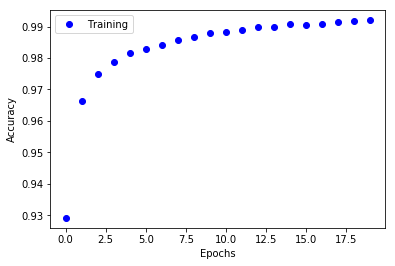

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
#val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training')
#plt.plot(epochs, val_acc, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

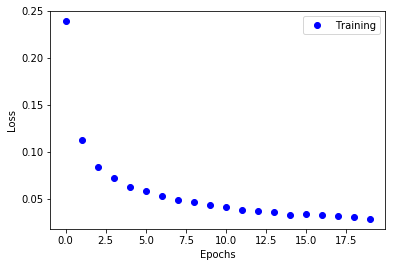

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

l1 = history.history['loss']
#l2 = history.history['val_loss']

epochs = range(len(l1))

plt.plot(epochs, l1, 'bo', label='Training')
#plt.plot(epochs, l2, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
predictions = model.predict(test)
predictions = np.argmax(predictions,axis = 1)

predictions = pd.Series(predictions,name="Label")

In [71]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"), predictions],axis = 1)

submission.to_csv("submission.csv",index=False)